# 📊 Task 1: Zomato Restaurant Rating Prediction


**Internship:** Cognifyz Technologies  
**Intern:** Ashok R  
**Task Objective:** Predict restaurant ratings using machine learning on Zomato data.  
**Model Goal:** Train ML models and evaluate their accuracy on cleaned data.  


# Step 1: Import Libraries & Load Dataset

In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [196]:
df = pd.read_csv(r"C:\Users\ashok\Downloads\Cognifyz_intern\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [122]:
df.shape

(9551, 21)

 # Step 2: Data Cleaning

In [125]:
df.isnull().values.any()

np.True_

In [127]:
df.isnull().values.sum()

np.int64(9)

In [129]:
df.columns[df.isnull().any()]

Index(['Cuisines'], dtype='object')

In [132]:
# Drop rows with null values
df.dropna(inplace=True)


In [134]:
print("Final shape after cleaning:", df.shape)

Final shape after cleaning: (9542, 21)


In [136]:
df.drop([
    'Restaurant ID', 'Restaurant Name', 'Country Code', 'Address',
    'Locality', 'Locality Verbose', 'Currency', 'Has Table booking',
    'Has Online delivery', 'Is delivering now', 'Switch to order menu',
    'Rating color', 'Rating text'
], axis=1, inplace=True)


In [138]:
print("Any missing values left?", df.isnull().sum())

Any missing values left? City                    0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64


In [140]:
df.isnull().values.sum()

np.int64(0)

In [142]:
df.isnull().values.any()

np.False_

# Step 3: Encode Categorical Columns

In [145]:
df.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [147]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Cuisines'] = le.fit_transform(df['Cuisines'])

In [149]:
df.dtypes

City                      int64
Longitude               float64
Latitude                float64
Cuisines                  int64
Average Cost for two      int64
Price range               int64
Aggregate rating        float64
Votes                     int64
dtype: object

# Step 4: Feature Selection & Train-Test Split

In [152]:
df.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [154]:
features = ['City', 'Longitude', 'Latitude', 'Cuisines',
            'Average Cost for two', 'Price range', 'Votes']
target = 'Aggregate rating'


In [156]:
# Define X = features and y = target
X = df[features]
y = df[target]

In [159]:
# Train-test split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# Check the shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (7633, 7)
X_test: (1909, 7)
y_train: (7633,)
y_test: (1909,)


In [163]:
X_train

,City,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Votes
8177,88,77.353663,28.574219,1699,450,1,6
6401,87,77.134360,28.671141,1626,700,2,112
81,120,-46.746958,-23.609207,1171,120,4,11
1332,50,77.086080,28.482318,1275,300,1,0
9041,88,77.339801,28.586405,58,500,2,93
...,...,...,...,...,...,...,...
5743,87,77.052860,28.664641,1329,250,1,1
5200,87,77.211180,28.536406,241,300,1,308
5399,87,77.128051,28.478595,1306,500,2,4
869,43,77.305745,28.490062,177,100,1,7


In [165]:
X_test

,City,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Votes
7142,87,0.000000,0.000000,586,150,1,2
1860,50,77.064227,28.467934,147,1500,3,105
4425,87,77.250660,28.543755,1306,250,1,55
3219,87,77.230277,28.572796,1031,1500,3,245
8308,88,77.331711,28.548867,518,200,1,0
...,...,...,...,...,...,...,...
5612,87,77.219281,28.709557,1306,100,1,0
4061,87,0.000000,0.000000,758,500,2,0
8746,88,77.385241,28.569480,1650,400,1,0
7678,87,77.056812,28.622119,1329,400,1,3


In [167]:
y_train

8177    2.8
6401    3.2
81      4.1
1332    0.0
9041    3.4
       ... 
5743    0.0
5200    4.0
5399    3.0
869     2.8
7279    0.0
Name: Aggregate rating, Length: 7633, dtype: float64

In [169]:
y_test

7142    0.0
1860    4.1
4425    3.3
3219    3.9
8308    0.0
       ... 
5612    0.0
4061    0.0
8746    0.0
7678    0.0
4430    3.3
Name: Aggregate rating, Length: 1909, dtype: float64

# Step 5: Model Training and Evaluation

## Step 1 : Linear Regression

In [173]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [175]:
# Predict on test data
y_pred = model.predict(X_test)


### Evaluate the Model

In [217]:
# Mean Squared Error (lower is better)
mse = mean_squared_error(y_test, y_pred)
# R-squared (closer to 1 is better)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", round(mse, 3))
print("R² Score:", round(r2, 3))

Mean Squared Error: 1.67
R² Score: 0.271


In [219]:
report1 = pd.DataFrame([['Linear Regression',mse,r2]],columns =['Model','Mean Squared Error','R² Score'])

## Step 2 : Decision Tree Regressor

In [222]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

### Evaluate the Model

In [225]:
mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print("🌳 Decision Tree - MSE:", round(mse, 3))
print("🌳 Decision Tree - R² Score:", round(r2, 3))


🌳 Decision Tree - MSE: 0.108
🌳 Decision Tree - R² Score: 0.953


In [227]:
report2 = pd.DataFrame([['Decision Tree Regressor',mse,r2]],columns =['Model','Mean Squared Error','R² Score'])

## Step 3 : Random Forest

In [230]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

### Evaluate the Model

In [232]:
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print("🌲 Random Forest - MSE:",round(mse,3))
print("🌲 Random Forest - R² Score:", round(r2,3))

🌲 Random Forest - MSE: 0.091
🌲 Random Forest - R² Score: 0.96


In [233]:
report3 = pd.DataFrame([['Random Forest Regressor',mse,r2]],columns =['Model','Mean Squared Error','R² Score'])

## Reports

In [238]:
final_report1 = pd.concat([report1,report2,report3], ignore_index=True)
final_report1

,Model,Mean Squared Error,R² Score
0,Linear Regression,1.669872,0.270809
1,Decision Tree Regressor,0.108230,0.952739
2,Random Forest Regressor,0.091066,0.960234


## Feature Importance 

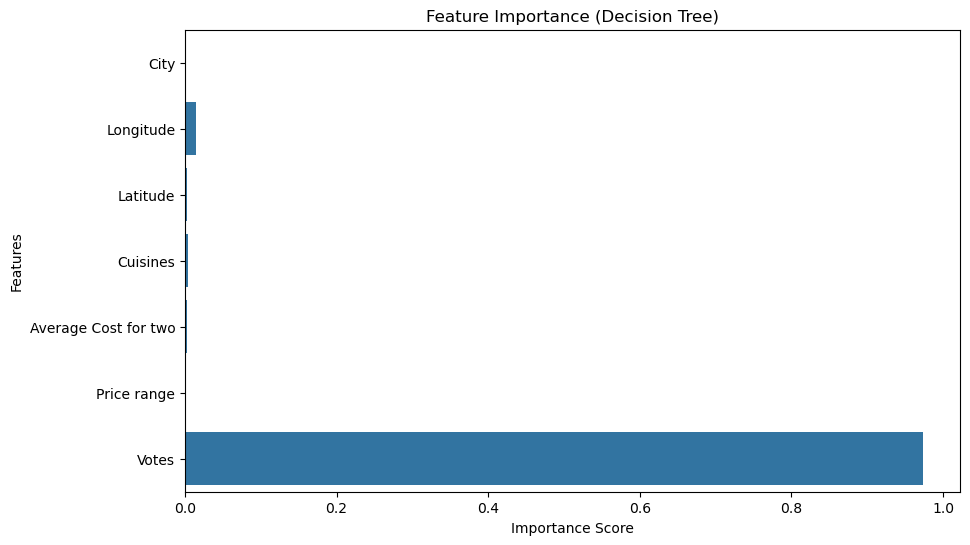

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get importance
importances = tree_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# Predict single observation

##Pick a row from your DataFrame

In [81]:
y_test

7142    0.0
1860    4.1
4425    3.3
3219    3.9
8308    0.0
       ... 
5612    0.0
4061    0.0
8746    0.0
7678    0.0
4430    3.3
Name: Aggregate rating, Length: 1909, dtype: float64

In [87]:
# Get the actual index of the test row
index = X_test.index[0]

# Now use that index to get the actual rating
actual_rating = y_test.loc[index]


In [89]:
X_test.loc[1860]

City                      50.000000
Longitude                 77.064227
Latitude                  28.467934
Cuisines                 147.000000
Average Cost for two    1500.000000
Price range                3.000000
Votes                    105.000000
Name: 1860, dtype: float64

##Reshape it for prediction

In [106]:
#Pick row 0 from test set
single_input = X_test.loc[1860].values.reshape(1, -1)
single_input

array([[  50.       ,   77.0642265,   28.4679344,  147.       ,
        1500.       ,    3.       ,  105.       ]])

## Make the prediction

In [94]:
#Predict
predicted_rating = rf_model.predict(single_input)

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


##Compare With Actual Rating

In [96]:
# Compare with actual value
actual_rating = y_test.loc[1860]

In [98]:

print("⭐ Predicted Rating:", round(predicted_rating[0], 2))
print("✅ Actual Rating:", actual_rating)


⭐ Predicted Rating: 3.6
✅ Actual Rating: 4.1


## ✅ Conclusion


- Successfully predicted restaurant ratings using machine learning.
- Best model: **Random Forest** with **R² Score: ~0.960234**.
- This project showcases data cleaning, encoding, model building, and evaluation.
